In [1]:
import matplotlib.pyplot as plt
import nest
import numpy


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Jul 13 2025 01:06:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:

nest.ResetKernel()
nest.Install("nestml_gap_hh_psc_alpha_neuron_module")
nest.resolution = 0.05


Sep 05 17:49:54 Install [Info]: 
    loaded module nestml_gap_hh_psc_alpha_neuron_module

Sep 05 17:49:54 hh_psc_alpha_neuron_nestml [Warning]: 
    Simulation resolution has changed. Internal state and parameters of the 
    model have been reset!

Sep 05 17:49:54 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.05 ms.


In [3]:


neuron = nest.Create("hh_psc_alpha_neuron_nestml", 2)
neuron.I_e = 650.0
neuron[0].V_m = -10.0

In [4]:

vm = nest.Create("voltmeter", params={"interval": 0.1})
nest.Connect(vm, neuron, "all_to_all")

In [5]:
with_gaps = True
if with_gaps:
    nest.Connect(
        neuron, neuron, 
        {"rule": "all_to_all", "allow_autapses": False}, 
        {"synapse_model": "gap_junction", "weight": 0.5}
    )


Sep 05 17:49:54 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Sep 05 17:49:54 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 250
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Sep 05 17:49:54 SimulationManager::run [Info]: 
    Simulation finished.


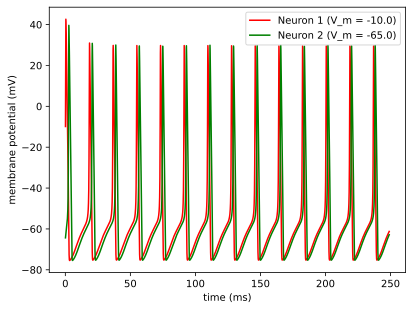

In [6]:
nest.Simulate(250.0)

senders = vm.events["senders"]
times = vm.events["times"]
v_m_values = vm.events["V_m"]


plt.figure(1)
plt.plot(
    times[numpy.where(senders == 1)], v_m_values[numpy.where(senders == 1)], "r-",
    label="Neuron 1 (V_m = -10.0)")
plt.plot(
    times[numpy.where(senders == 2)], v_m_values[numpy.where(senders == 2)], "g-", label="Neuron 2 (V_m = -65.0)")
plt.legend(loc='upper right')
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.savefig(f"images/hh_{'with' if with_gaps else 'without'}.png")
plt.show()
